## Bike Sharing Demand 진행방향 
1. 훈련, 테스트 데이터셋의 형태 및 컬럼의 속성 데이터 값 파악
2. 데이터 전처리 및 시각화
3. 회귀 모델 적용
4. 결론 도출

함수 사용 꿀팀 

특정 함수 스펙 및 설명이 알고 싶다면 help()로 출력해 볼 수 있다. 

ex) help(pandas.unique)

In [1]:
""" 필요한 라이브러리 호출 """

import warnings 
warnings.filterwarnings("ignore")

import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

import calendar
from datetime import datetime

import os 
print(os.listdir("./data"))

['.DS_Store', 'bike-sharing-demand', '무제 폴더']


In [2]:
""" 
1) 훈련, 테스트 데이터 셋의 개괄적인 형태 및 데이터 컬럼의 속성 및 값의 개수 파악.
"""
train = pd.read_csv('./data/bike-sharing-demand/train.csv')
test = pd.read_csv('./data/bike-sharing-demand/test.csv')

### 훈련 데이터 셋의 개괄적인 형태 및 컬럼 정보

In [3]:
train.head()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,3,13,16
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,8,32,40
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0,5,27,32
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0,3,10,13
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0,0,1,1


In [4]:
train.tail()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
10881,2012-12-19 19:00:00,4,0,1,1,15.58,19.695,50,26.0027,7,329,336
10882,2012-12-19 20:00:00,4,0,1,1,14.76,17.425,57,15.0013,10,231,241
10883,2012-12-19 21:00:00,4,0,1,1,13.94,15.910,61,15.0013,4,164,168
10884,2012-12-19 22:00:00,4,0,1,1,13.94,17.425,61,6.0032,12,117,129
10885,2012-12-19 23:00:00,4,0,1,1,13.12,16.665,66,8.9981,4,84,88


In [5]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10886 entries, 0 to 10885
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   datetime    10886 non-null  object 
 1   season      10886 non-null  int64  
 2   holiday     10886 non-null  int64  
 3   workingday  10886 non-null  int64  
 4   weather     10886 non-null  int64  
 5   temp        10886 non-null  float64
 6   atemp       10886 non-null  float64
 7   humidity    10886 non-null  int64  
 8   windspeed   10886 non-null  float64
 9   casual      10886 non-null  int64  
 10  registered  10886 non-null  int64  
 11  count       10886 non-null  int64  
dtypes: float64(3), int64(8), object(1)
memory usage: 1020.7+ KB


### 테스트 데이터 셋의 개괄적인 형태 및 컬럼 정보

In [6]:
test.head()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed
0,2011-01-20 00:00:00,1,0,1,1,10.66,11.365,56,26.0027
1,2011-01-20 01:00:00,1,0,1,1,10.66,13.635,56,0.0000
2,2011-01-20 02:00:00,1,0,1,1,10.66,13.635,56,0.0000
3,2011-01-20 03:00:00,1,0,1,1,10.66,12.880,56,11.0014
4,2011-01-20 04:00:00,1,0,1,1,10.66,12.880,56,11.0014


In [7]:
""" 
2) 데이터 전처리 및 시각화
"""

# datetime 컬럼을 이용해 year, month, day 컬럼을 추출

train['year'] = train.datetime.apply(lambda x:x.split('-')[0])
train['month'] = train.datetime.apply(lambda x:x.split('-')[1])
train['day'] = train.datetime.apply(lambda x:x.split('-')[2].split(' ')[0])

In [8]:
train.head()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count,year,month,day
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,3,13,16,2011,01,01
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,8,32,40,2011,01,01
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0,5,27,32,2011,01,01
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0,3,10,13,2011,01,01
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0,0,1,1,2011,01,01


In [9]:
# calendar패키지와 datetime패키지를 사용해 datetime에서 weekday 컬럼을 추출 

train['weekday'] = train.datetime.apply(lambda x:calendar.day_name[datetime.strptime(x.split(' ')[0], "%Y-%m-%d").weekday()])
train['hour'] = train.datetime.apply(lambda x:x.split(' ')[1].split(':')[0])

In [10]:
# 추출을 통해 정의된 컬럼은 문자열 속성을 가지므로 숫자형 데이터로 변환해 줄 필요가 있다.
# pandas.to_numeric() 
# errors = 'coerce' -> 변환 불가능한 데이터를 만나면 그 값을 강제로 NaN으로 바꾸고 계속 진행한다. (강제변환)
train['year'] = pd.to_numeric(train.year, errors = 'coerce')
train['month'] = pd.to_numeric(train.month, errors = 'coerce')
train['day'] = pd.to_numeric(train.day, errors = 'coerce')
train['hour'] = pd.to_numeric(train.hour, errors = 'coerce')

In [11]:
train.head()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count,year,month,day,weekday,hour
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,3,13,16,2011,1,1,Saturday,0
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,8,32,40,2011,1,1,Saturday,1
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0,5,27,32,2011,1,1,Saturday,2
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0,3,10,13,2011,1,1,Saturday,3
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0,0,1,1,2011,1,1,Saturday,4


In [12]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10886 entries, 0 to 10885
Data columns (total 17 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   datetime    10886 non-null  object 
 1   season      10886 non-null  int64  
 2   holiday     10886 non-null  int64  
 3   workingday  10886 non-null  int64  
 4   weather     10886 non-null  int64  
 5   temp        10886 non-null  float64
 6   atemp       10886 non-null  float64
 7   humidity    10886 non-null  int64  
 8   windspeed   10886 non-null  float64
 9   casual      10886 non-null  int64  
 10  registered  10886 non-null  int64  
 11  count       10886 non-null  int64  
 12  year        10886 non-null  int64  
 13  month       10886 non-null  int64  
 14  day         10886 non-null  int64  
 15  weekday     10886 non-null  object 
 16  hour        10886 non-null  int64  
dtypes: float64(3), int64(12), object(2)
memory usage: 1.4+ MB


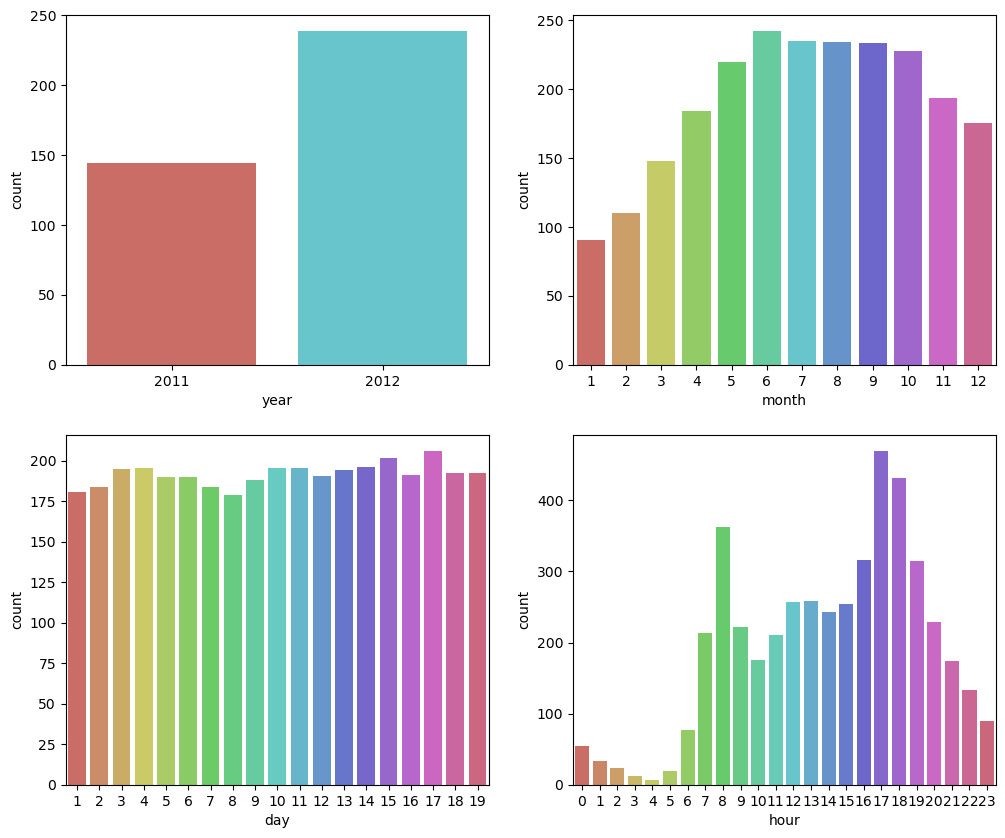

In [13]:
# 각각의 속성과 예측의 결과값으로 쓰이는 count값과의 관계 파악
hls_palette = 'hls'
# 연도('year')와 'count'
fig = plt.figure(figsize=(12,10))
ax1 = fig.add_subplot(2,2,1)
ax1 = sns.barplot(x='year', y='count', data = train.groupby('year')['count'].mean().reset_index(), palette=hls_palette)

# 월('month')와 'count'
ax2 = fig.add_subplot(2,2,2)
ax2 = sns.barplot(x='month', y='count', data = train.groupby('month')['count'].mean().reset_index(), palette=hls_palette)

# 일('day')과 'count'
ax3 = fig.add_subplot(2,2,3)
ax3 = sns.barplot(x='day', y='count', data = train.groupby('day')['count'].mean().reset_index(), palette=hls_palette)

# 시간('hour')과 'count'
ax4 = fig.add_subplot(2,2,4)
ax4 = sns.barplot(x='hour', y='count', data = train.groupby('hour')['count'].mean().reset_index(), palette=hls_palette)

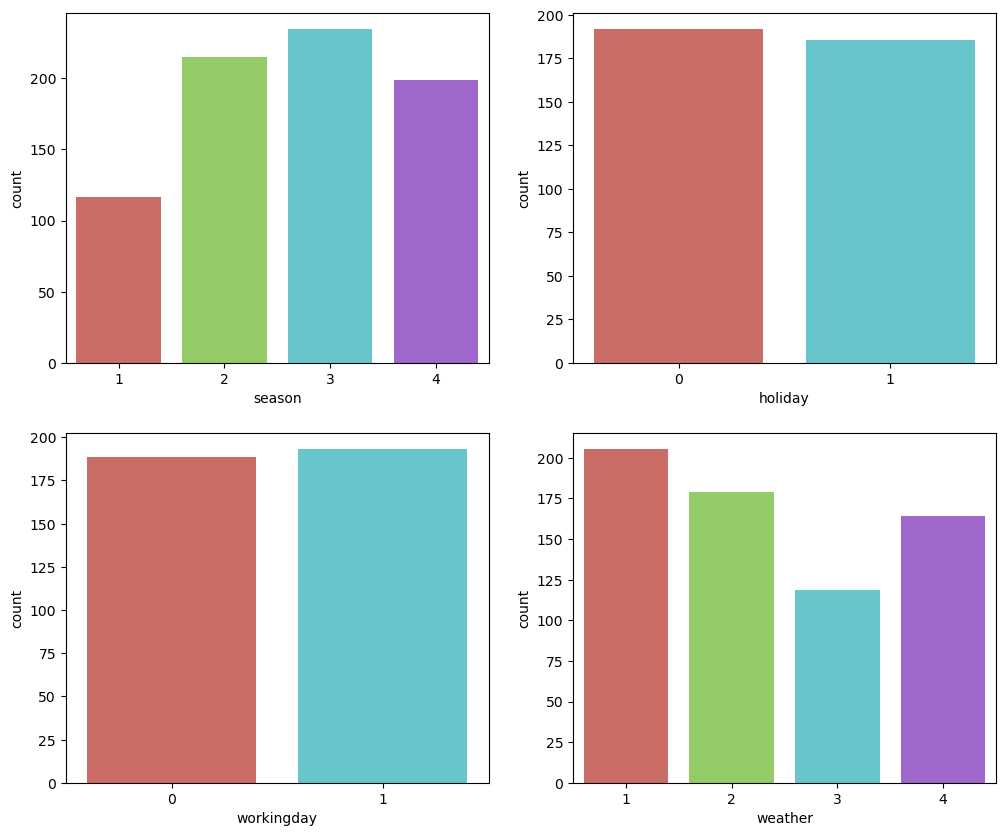

In [14]:
fig = plt.figure(figsize=(12,10))
# 계절('season')과 'count'
ax1 = fig.add_subplot(2,2,1)
ax1 = sns.barplot(x='season', y='count', data = train.groupby('season')['count'].mean().reset_index(), palette=hls_palette)

# 휴일 여부('holiday')와 'count'
ax2 = fig.add_subplot(2,2,2)
ax2 = sns.barplot(x='holiday', y='count', data = train.groupby('holiday')['count'].mean().reset_index(), palette = hls_palette)

# 작업일 여부('workingday')와 'count'
ax3 = fig.add_subplot(2,2,3)
ax3 = sns.barplot(x='workingday', y='count', data = train.groupby('workingday')['count'].mean().reset_index(), palette=hls_palette)

# 날씨('weather')와 'count'
ax4 = fig.add_subplot(2,2,4)
ax4 = sns.barplot(x='weather', y='count', data = pd.DataFrame(train.groupby('weather')['count'].mean()), palette=hls_palette)

# Why reset_index()
# groupby() 후 reset_index()를 통해 pandas.DataFrame 형태로 변환하는 듯 하다.
# 그냥 pandas.DataFrame()으로 묶어주어도 된다. 

In [15]:
type(train.groupby('weather')['count'].mean())
train.groupby("weather")['count'].mean()

weather
1    205.236791
2    178.955540
3    118.846333
4    164.000000
Name: count, dtype: float64

In [16]:
train[train['season']==1]

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count,year,month,day,weekday,hour
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0000,3,13,16,2011,1,1,Saturday,0
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0000,8,32,40,2011,1,1,Saturday,1
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0000,5,27,32,2011,1,1,Saturday,2
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0000,3,10,13,2011,1,1,Saturday,3
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0000,0,1,1,2011,1,1,Saturday,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6780,2012-03-19 19:00:00,1,0,1,1,25.42,30.305,61,15.0013,86,463,549,2012,3,19,Monday,19
6781,2012-03-19 20:00:00,1,0,1,1,24.60,30.305,64,15.0013,34,296,330,2012,3,19,Monday,20
6782,2012-03-19 21:00:00,1,0,1,1,24.60,30.305,64,11.0014,33,190,223,2012,3,19,Monday,21
6783,2012-03-19 22:00:00,1,0,1,2,22.96,26.515,73,11.0014,17,131,148,2012,3,19,Monday,22


In [17]:
"""
train data의 1월의 season 컬럼이 1로 봄을 가리킨다. 
워싱턴의 1월은 겨울이므로 train data의 season 컬럼을 다음과 같은 기준으로 수정.
month in [3,4,5] -> season = 1
month in [6,7,8] -> season = 2
month in [9,10,11] -> season = 3
month in [12,1,2] -> season = 4
"""
def editSeason(month):
    if month in [3,4,5]:
        return 1
    elif month in [6,7,8]:
        return 2
    elif month in [9,10,11]:
        return 3
    elif month in [12,1,2]:
        return 4

# apply() 내장함수는 split(), map(), join(), filter() 등과 함께 필수적으로 숙지해야 할 함수 
train['season'] = train.month.apply(editSeason)

In [18]:
train.head(10)

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count,year,month,day,weekday,hour
0,2011-01-01 00:00:00,4,0,0,1,9.84,14.395,81,0.0000,3,13,16,2011,1,1,Saturday,0
1,2011-01-01 01:00:00,4,0,0,1,9.02,13.635,80,0.0000,8,32,40,2011,1,1,Saturday,1
2,2011-01-01 02:00:00,4,0,0,1,9.02,13.635,80,0.0000,5,27,32,2011,1,1,Saturday,2
3,2011-01-01 03:00:00,4,0,0,1,9.84,14.395,75,0.0000,3,10,13,2011,1,1,Saturday,3
4,2011-01-01 04:00:00,4,0,0,1,9.84,14.395,75,0.0000,0,1,1,2011,1,1,Saturday,4
5,2011-01-01 05:00:00,4,0,0,2,9.84,12.880,75,6.0032,0,1,1,2011,1,1,Saturday,5
6,2011-01-01 06:00:00,4,0,0,1,9.02,13.635,80,0.0000,2,0,2,2011,1,1,Saturday,6
7,2011-01-01 07:00:00,4,0,0,1,8.20,12.880,86,0.0000,1,2,3,2011,1,1,Saturday,7
8,2011-01-01 08:00:00,4,0,0,1,9.84,14.395,75,0.0000,1,7,8,2011,1,1,Saturday,8
9,2011-01-01 09:00:00,4,0,0,1,13.12,17.425,76,0.0000,8,6,14,2011,1,1,Saturday,9


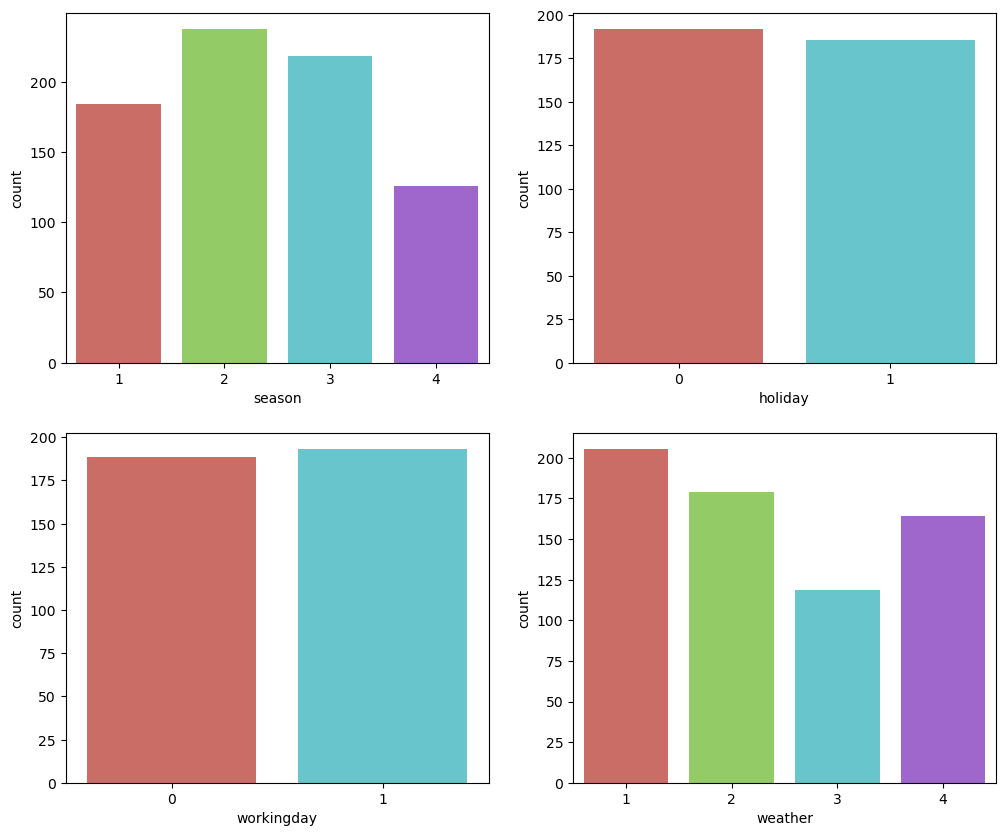

In [19]:
fig = plt.figure(figsize=(12,10))
# 수정 된 계절('season')과 'count'
ax1 = fig.add_subplot(2,2,1)
ax1 = sns.barplot(x='season', y='count', data = train.groupby('season')['count'].mean().reset_index(), palette=hls_palette)

# 휴일 여부('holiday')와 'count'
ax2 = fig.add_subplot(2,2,2)
ax2 = sns.barplot(x='holiday', y='count', data = train.groupby('holiday')['count'].mean().reset_index(), palette = hls_palette)

# 작업일 여부('workingday')와 'count'
ax3 = fig.add_subplot(2,2,3)
ax3 = sns.barplot(x='workingday', y='count', data = train.groupby('workingday')['count'].mean().reset_index(), palette=hls_palette)

# 날씨('weather')와 'count'
ax4 = fig.add_subplot(2,2,4)
ax4 = sns.barplot(x='weather', y='count', data = pd.DataFrame(train.groupby('weather')['count'].mean()), palette=hls_palette)

# Why reset_index()
# groupby() 후 reset_index()를 통해 pandas.DataFrame 형태로 변환하는 듯 하다.
# 그냥 pandas.DataFrame()으로 묶어주어도 된다. 

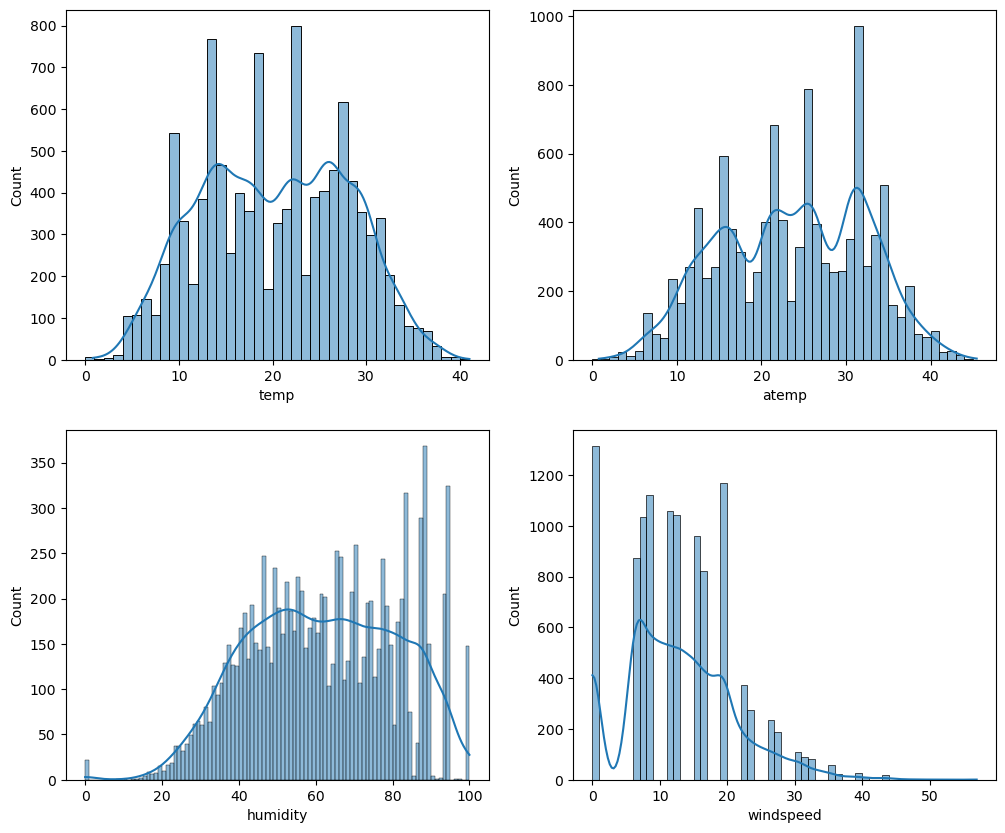

In [20]:
# 분포를 통해 시각화 했을 때 좋은 컬럼들을 count와 비교 
fig = plt.figure(figsize=(12,10))

# 온도('temp') 분포
ax1 = fig.add_subplot(2,2,1)
ax1 = sns.histplot(train.temp,bins=range(train.temp.min().astype('int'),train.temp.max().astype('int')+1), kde=True)
# ax1 = sns.histplot(train.groupby('temp')['count'].count().reset_index(), x='temp', y='count',
#                    bins=range(train.temp.min().astype('int'), train.temp.max().astype('int')+1))

# 체감온도('atemp') 분포 
ax2 = fig.add_subplot(2,2,2)
ax2 = sns.histplot(train.atemp, bins=range(int(train.atemp.min()), int(train.atemp.max()+1)), kde=True)

#습도('humidity') 분포
ax3 = fig.add_subplot(2,2,3)
ax3 = sns.histplot(train.humidity, bins=range(int(train.humidity.min()), int(train.humidity.max())+1), kde=True)

# 바람속도('windspeed') 분포 
ax4 = fig.add_subplot(2,2,4)
ax4 = sns.histplot(train.windspeed, bins=range(int(train.windspeed.min()), int(train.windspeed.max())+1), kde=True)

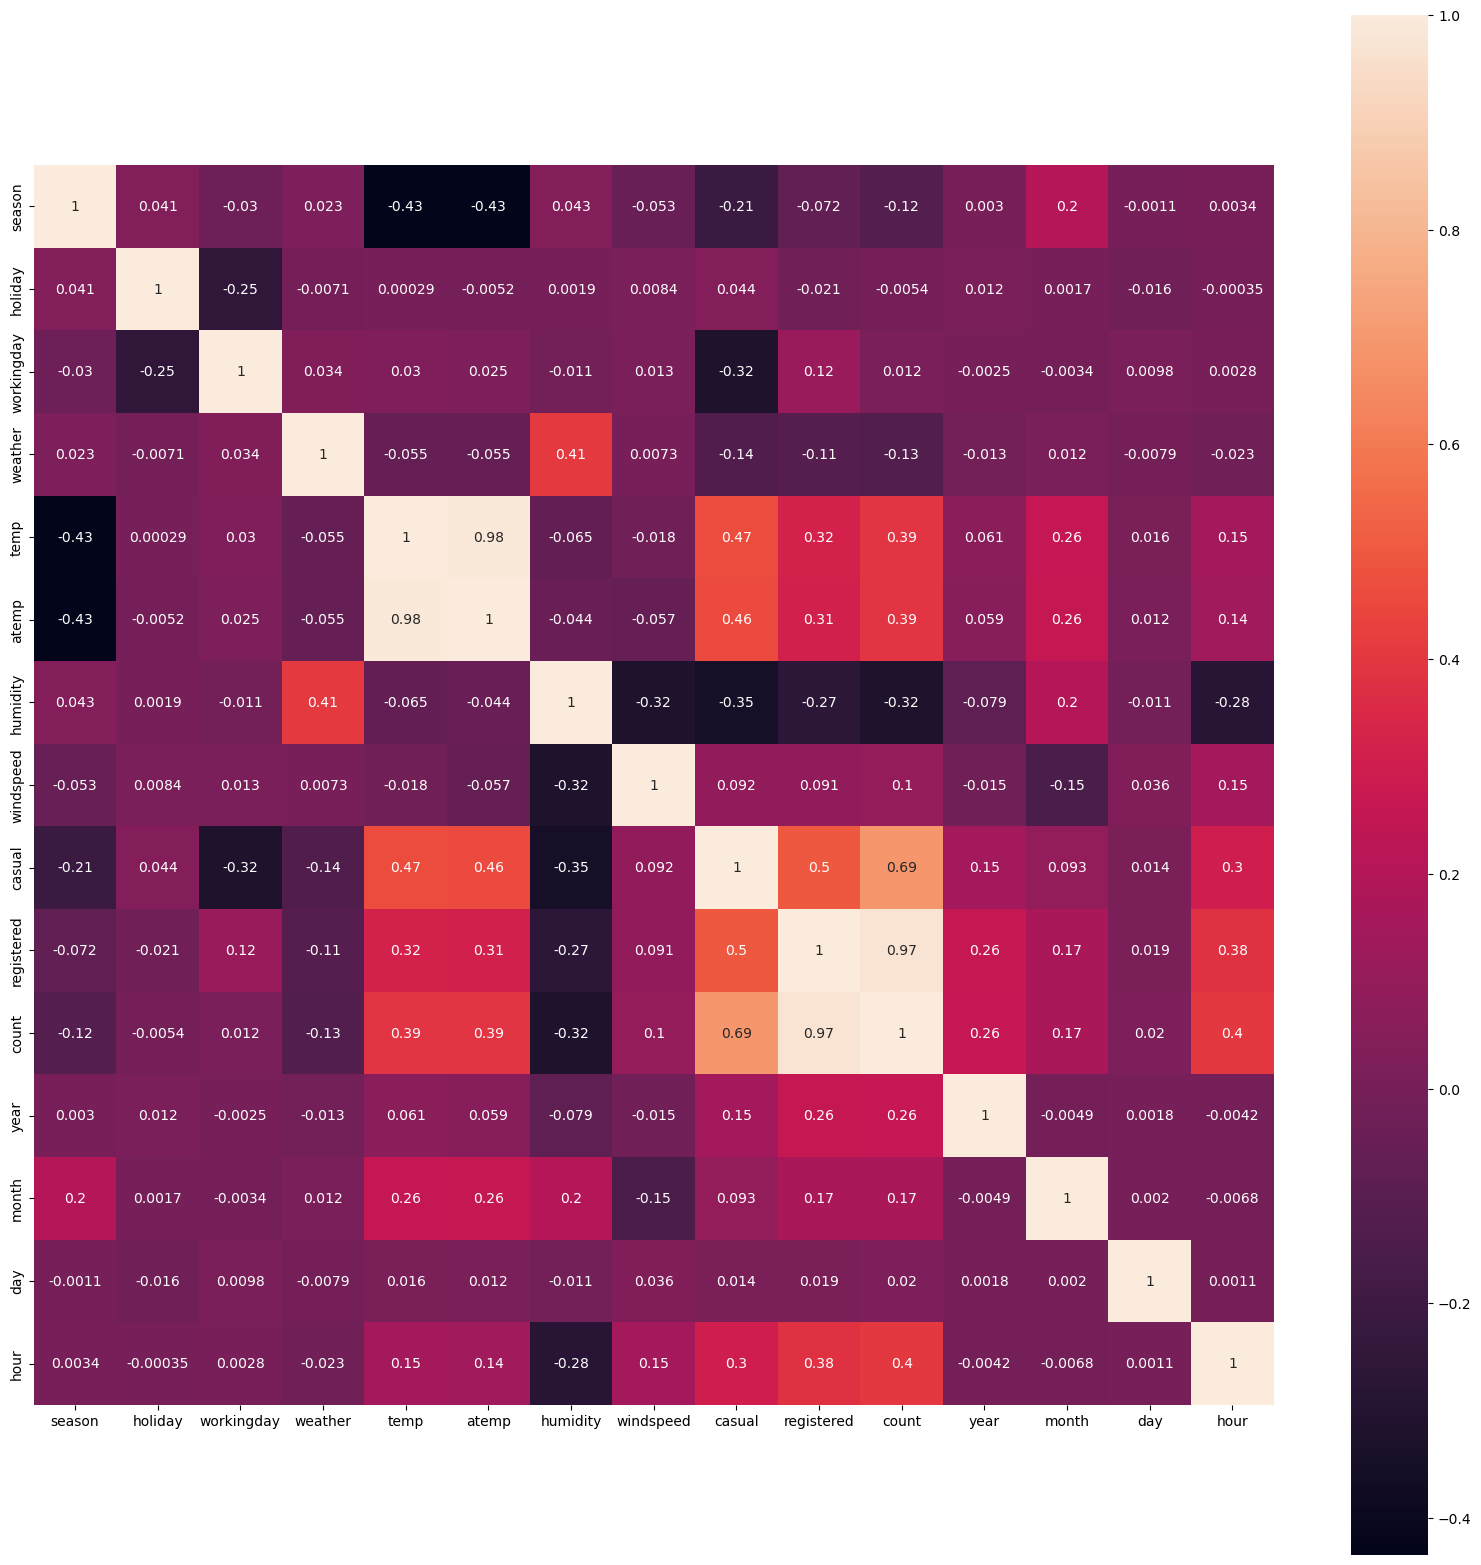

In [21]:
fig = plt.figure(figsize=(20,20))
ax = sns.heatmap(train.drop(columns=['datetime', 'weekday'], axis=1).corr(), annot=True, square=True)

In [22]:
# weekday 컬럼을 크론 표현식으로 변경 

def weekday2int(weekday):
    if weekday == 'Sunday':
        return 0
    elif weekday == 'Monday':
        return 1
    elif weekday == 'Tuesday':
        return 2
    elif weekday == 'Wednesday':
        return 3
    elif weekday == 'Thursday':
        return 4
    elif weekday == 'Friday':
        return 5
    elif weekday == 'Saturday':
        return 6
    
train['weekday'] = train.weekday.apply(weekday2int)

In [23]:
train.head()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count,year,month,day,weekday,hour
0,2011-01-01 00:00:00,4,0,0,1,9.84,14.395,81,0.0,3,13,16,2011,1,1,6,0
1,2011-01-01 01:00:00,4,0,0,1,9.02,13.635,80,0.0,8,32,40,2011,1,1,6,1
2,2011-01-01 02:00:00,4,0,0,1,9.02,13.635,80,0.0,5,27,32,2011,1,1,6,2
3,2011-01-01 03:00:00,4,0,0,1,9.84,14.395,75,0.0,3,10,13,2011,1,1,6,3
4,2011-01-01 04:00:00,4,0,0,1,9.84,14.395,75,0.0,0,1,1,2011,1,1,6,4


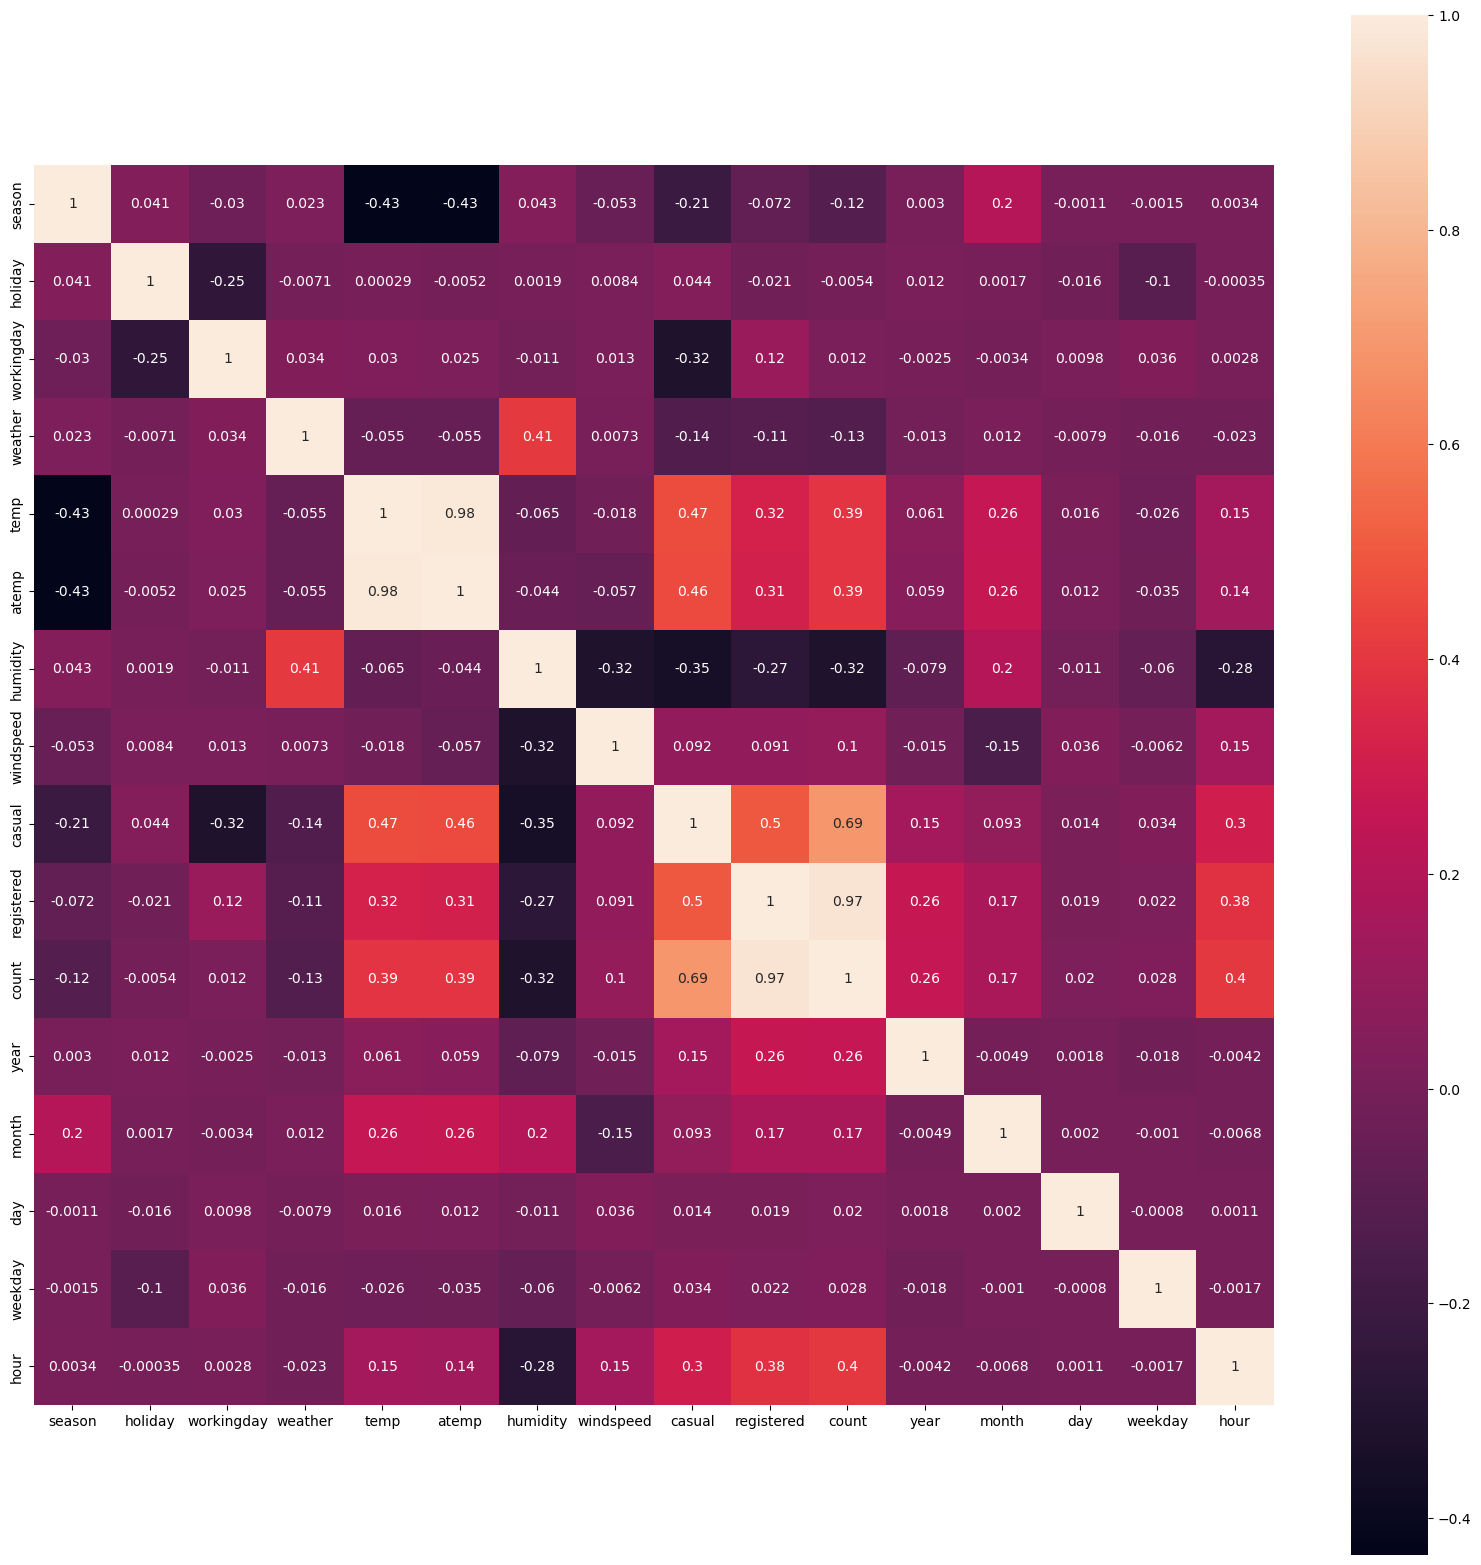

In [24]:
fig = plt.figure(figsize=(20,20))
ax = sns.heatmap(train.drop(columns=['datetime'], axis=1).corr(), annot=True, square=True)

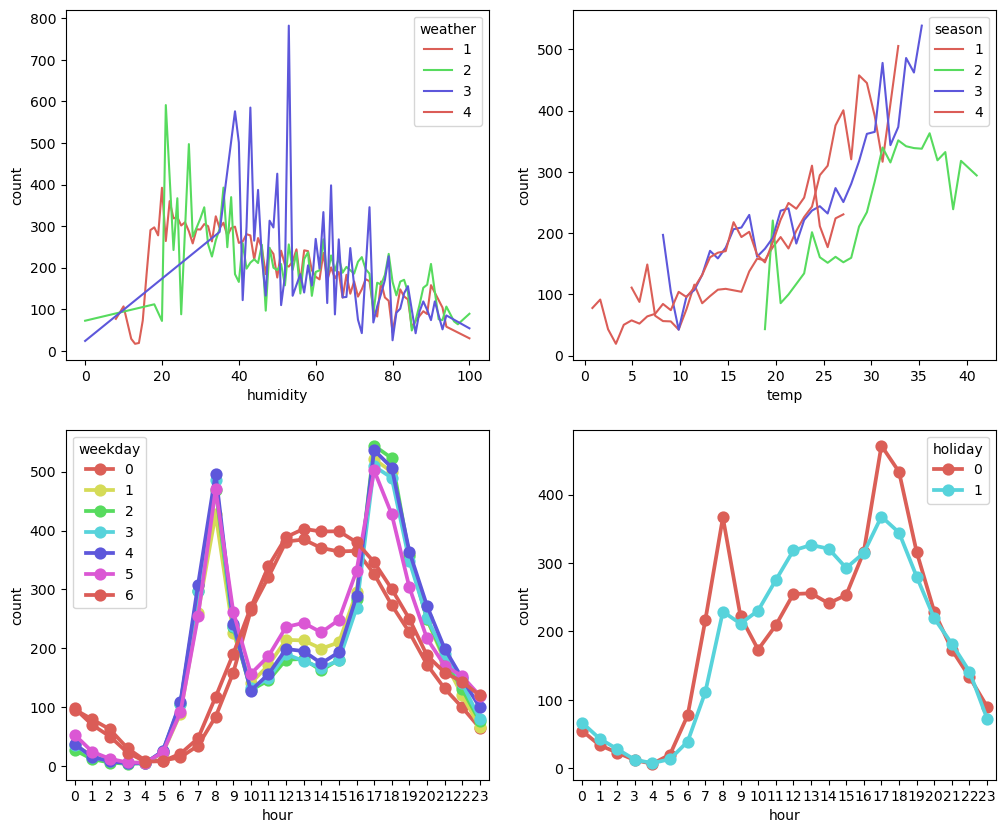

In [25]:
"""
heatmap을 참조하여 두 개의 서로 다른 컬럼이 적용된 count 시각화 
"""
fig = plt.figure(figsize=(12,10))

# 날씨(weather)와 습도(humidity)에 따른 count
ax1 = fig.add_subplot(2,2,1)
ax1 = sns.lineplot(data=train.groupby(['weather', 'humidity'])['count'].mean().reset_index(),
                   x='humidity', y='count', hue='weather', palette=hls_palette)

# 계절과 온도에 따른 count
ax2 = fig.add_subplot(2,2,2)
ax2 = sns.lineplot(data=train.groupby(['season', 'temp'])['count'].mean().reset_index(),
                   x='temp', y='count', hue='season', palette=hls_palette)
# 요일과 시간에 따른 count
ax3 = fig.add_subplot(2,2,3)
ax3 = sns.pointplot(data=train.groupby(['weekday', 'hour'])['count'].mean().reset_index(),
                    x='hour', y='count', hue='weekday', palette=hls_palette)
# 휴일여부와 시간에 따른 count
ax4 = fig.add_subplot(2,2,4)
ax4 = sns.pointplot(data=train.groupby(['holiday', 'hour'])['count'].mean().reset_index(),
                    x='hour', y='count', hue='holiday', palette=hls_palette)

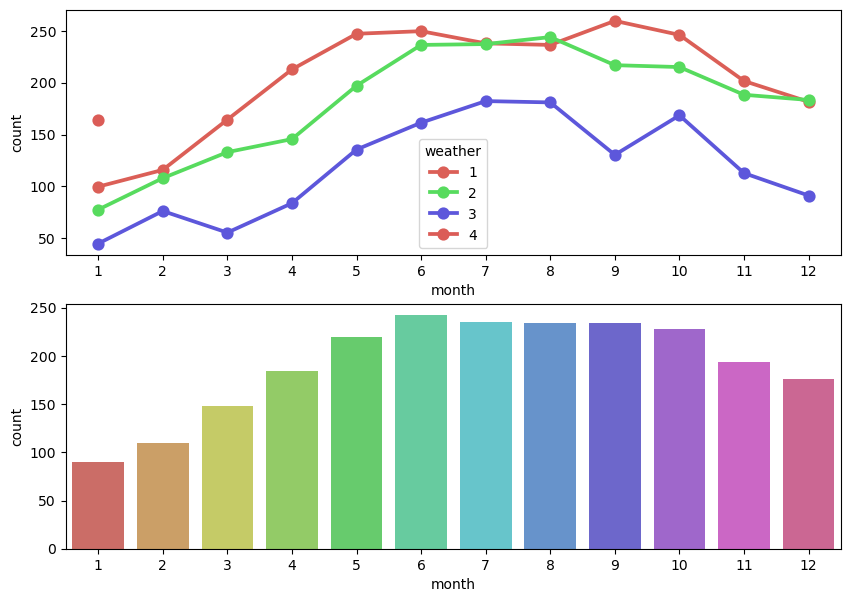

In [26]:
fig = plt.figure(figsize=(10,7))
# 달과 날씨에 따른 count
ax1 = fig.add_subplot(2,1,1)
ax1 = sns.pointplot(data=train.groupby(['month', 'weather'])['count'].mean().reset_index(),
                    x='month', y='count', hue='weather', palette=hls_palette)

# 달 별 count
ax2 = fig.add_subplot(2,1,2)
ax2 = sns.barplot(data=train.groupby('month')['count'].mean().reset_index(), 
                  x='month', y='count', palette=hls_palette)


In [27]:
"""
windspeed 컬럼 분포를 보면 0의 비율이 상당히 높은 것을 알 수 있음. 
실제로 0이거나, 값을 제대로 측정하지 못해서 0이거나 두 개의 경우 중 하나이다.

분석 연습이니, 후자의 생각을 가지고 나머지 데이터를 활용하여 windspeed에 값을 부여 해보자.
"""

train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10886 entries, 0 to 10885
Data columns (total 17 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   datetime    10886 non-null  object 
 1   season      10886 non-null  int64  
 2   holiday     10886 non-null  int64  
 3   workingday  10886 non-null  int64  
 4   weather     10886 non-null  int64  
 5   temp        10886 non-null  float64
 6   atemp       10886 non-null  float64
 7   humidity    10886 non-null  int64  
 8   windspeed   10886 non-null  float64
 9   casual      10886 non-null  int64  
 10  registered  10886 non-null  int64  
 11  count       10886 non-null  int64  
 12  year        10886 non-null  int64  
 13  month       10886 non-null  int64  
 14  day         10886 non-null  int64  
 15  weekday     10886 non-null  int64  
 16  hour        10886 non-null  int64  
dtypes: float64(3), int64(13), object(1)
memory usage: 1.4+ MB


In [28]:
"""

1) 전체 데이터 셋을 windspeed 값에 따라 분할 (windspeed==0 / windspeed!=0)

2) 총 17개의 컬럼 중에 windspeed 값 에측에 필요하지 않은 컬럼 차출.
- datetime : 연-월-일 시:분:초 에 해당하는 대여 시각
- casual : 비회원 대여 수
- registered : 회원 대여 수
- count : 전체 대여 수

산출 데이터프레임 
- windspeed_zero
- windspeed_not_zero
- windpseed_target 

3) 모델 로드
- windspeed 컬럼은 연속형 변수이므로 회귀 모델을 사용해야 한다.
- sklearn.ensemble.RandomForesetRegressor()

4) 모델 학습 
- model.fit()

5) 모델 추론
- model.predict()

"""

'\n\n1) 전체 데이터 셋을 windspeed 값에 따라 분할 (windspeed==0 / windspeed!=0)\n\n2) 총 17개의 컬럼 중에 windspeed 값 에측에 필요하지 않은 컬럼 차출.\n- datetime : 연-월-일 시:분:초 에 해당하는 대여 시각\n- casual : 비회원 대여 수\n- registered : 회원 대여 수\n- count : 전체 대여 수\n\n산출 데이터프레임 \n- windspeed_zero\n- windspeed_not_zero\n- windpseed_target \n\n3) 모델 로드\n- windspeed 컬럼은 연속형 변수이므로 회귀 모델을 사용해야 한다.\n- sklearn.ensemble.RandomForesetRegressor()\n\n4) 모델 학습 \n- model.fit()\n\n5) 모델 추론\n- model.predict()\n\n'

In [29]:

# 1) 데이터 분할 
# windspeed가 0인 데이터프레임
windspeed_zero = train[train['windspeed']==0]

# windspeed가 0이 아닌 데이터프레임
windspeed_not_zero = train[train['windspeed'] != 0]

# 2) 불필요한 컬럼 드랍
windspeed_zero = windspeed_zero.drop(columns=['datetime', 'casual','registered','count'])
windspeed_not_zero = windspeed_not_zero.drop(columns=['datetime', 'casual','registered','count'])


In [30]:
windspeed_zero = windspeed_zero.drop(columns=['windspeed'], axis=1)
windspeed_zero.head()

,season,holiday,workingday,weather,temp,atemp,humidity,year,month,day,weekday,hour
0,4,0,0,1,9.84,14.395,81,2011,1,1,6,0
1,4,0,0,1,9.02,13.635,80,2011,1,1,6,1
2,4,0,0,1,9.02,13.635,80,2011,1,1,6,2
3,4,0,0,1,9.84,14.395,75,2011,1,1,6,3
4,4,0,0,1,9.84,14.395,75,2011,1,1,6,4


In [31]:
# windspeed_not_zero 데이터프레임의 windspeed 컬럼 값을 target으로 지정 
windspeed_target = windspeed_not_zero['windspeed']
# windspeed_not_zero 데이터프레임의 windspeed 컬럼을 드랍
windspeed_not_zero = windspeed_not_zero.drop(columns=['windspeed'], axis=1)

In [32]:
windspeed_not_zero.head()

,season,holiday,workingday,weather,temp,atemp,humidity,year,month,day,weekday,hour
5,4,0,0,2,9.84,12.880,75,2011,1,1,6,5
10,4,0,0,1,15.58,19.695,76,2011,1,1,6,10
11,4,0,0,1,14.76,16.665,81,2011,1,1,6,11
12,4,0,0,1,17.22,21.210,77,2011,1,1,6,12
13,4,0,0,2,18.86,22.725,72,2011,1,1,6,13


In [33]:
# 3) 모델 로드 
from sklearn.ensemble import RandomForestRegressor

model = RandomForestRegressor()

In [34]:
# 4) 모델 학습
model.fit(X=windspeed_not_zero, y=windspeed_target)

RandomForestRegressor()

In [35]:
# 5) 모델 예측
windspeed_predict = model.predict(windspeed_zero)

In [36]:
windspeed_predict

array([ 8.111824,  7.992095,  7.842216, ...,  9.740795, 11.499545,
       11.451774])

In [37]:
# 6) 데이터프레임 병합 
windspeed_zero['windspeed'] = windspeed_predict
windspeed_not_zero['windspeed'] = windspeed_target

In [38]:
windspeed_zero.head()

,season,holiday,workingday,weather,temp,atemp,humidity,year,month,day,weekday,hour,windspeed
0,4,0,0,1,9.84,14.395,81,2011,1,1,6,0,8.111824
1,4,0,0,1,9.02,13.635,80,2011,1,1,6,1,7.992095
2,4,0,0,1,9.02,13.635,80,2011,1,1,6,2,7.842216
3,4,0,0,1,9.84,14.395,75,2011,1,1,6,3,7.052487
4,4,0,0,1,9.84,14.395,75,2011,1,1,6,4,7.002572


In [39]:
windspeed_not_zero.head()

,season,holiday,workingday,weather,temp,atemp,humidity,year,month,day,weekday,hour,windspeed
5,4,0,0,2,9.84,12.880,75,2011,1,1,6,5,6.0032
10,4,0,0,1,15.58,19.695,76,2011,1,1,6,10,16.9979
11,4,0,0,1,14.76,16.665,81,2011,1,1,6,11,19.0012
12,4,0,0,1,17.22,21.210,77,2011,1,1,6,12,19.0012
13,4,0,0,2,18.86,22.725,72,2011,1,1,6,13,19.9995


In [40]:
train_ = pd.concat([windspeed_zero, windspeed_not_zero], axis=0)

In [41]:
train_.head(10)

,season,holiday,workingday,weather,temp,atemp,humidity,year,month,day,weekday,hour,windspeed
0,4,0,0,1,9.84,14.395,81,2011,1,1,6,0,8.111824
1,4,0,0,1,9.02,13.635,80,2011,1,1,6,1,7.992095
2,4,0,0,1,9.02,13.635,80,2011,1,1,6,2,7.842216
3,4,0,0,1,9.84,14.395,75,2011,1,1,6,3,7.052487
4,4,0,0,1,9.84,14.395,75,2011,1,1,6,4,7.002572
6,4,0,0,1,9.02,13.635,80,2011,1,1,6,6,7.772067
7,4,0,0,1,8.20,12.880,86,2011,1,1,6,7,9.011634
8,4,0,0,1,9.84,14.395,75,2011,1,1,6,8,9.301476
9,4,0,0,1,13.12,17.425,76,2011,1,1,6,9,13.310220
64,4,0,1,1,8.20,12.880,47,2011,1,3,1,19,7.961476


In [42]:
train_['casual'] = train.casual
train_['registered'] = train.registered
train_['count'] = train['count']

In [43]:
train_.head(15)

,season,holiday,workingday,weather,temp,atemp,humidity,year,month,day,weekday,hour,windspeed,casual,registered,count
0,4,0,0,1,9.84,14.395,81,2011,1,1,6,0,8.111824,3,13,16
1,4,0,0,1,9.02,13.635,80,2011,1,1,6,1,7.992095,8,32,40
2,4,0,0,1,9.02,13.635,80,2011,1,1,6,2,7.842216,5,27,32
3,4,0,0,1,9.84,14.395,75,2011,1,1,6,3,7.052487,3,10,13
4,4,0,0,1,9.84,14.395,75,2011,1,1,6,4,7.002572,0,1,1
6,4,0,0,1,9.02,13.635,80,2011,1,1,6,6,7.772067,2,0,2
7,4,0,0,1,8.20,12.880,86,2011,1,1,6,7,9.011634,1,2,3
8,4,0,0,1,9.84,14.395,75,2011,1,1,6,8,9.301476,1,7,8
9,4,0,0,1,13.12,17.425,76,2011,1,1,6,9,13.310220,8,6,14
64,4,0,1,1,8.20,12.880,47,2011,1,3,1,19,7.961476,8,102,110


In [44]:
train_ = train_.sort_index()

In [45]:
train_.head(15)

,season,holiday,workingday,weather,temp,atemp,humidity,year,month,day,weekday,hour,windspeed,casual,registered,count
0,4,0,0,1,9.84,14.395,81,2011,1,1,6,0,8.111824,3,13,16
1,4,0,0,1,9.02,13.635,80,2011,1,1,6,1,7.992095,8,32,40
2,4,0,0,1,9.02,13.635,80,2011,1,1,6,2,7.842216,5,27,32
3,4,0,0,1,9.84,14.395,75,2011,1,1,6,3,7.052487,3,10,13
4,4,0,0,1,9.84,14.395,75,2011,1,1,6,4,7.002572,0,1,1
5,4,0,0,2,9.84,12.880,75,2011,1,1,6,5,6.003200,0,1,1
6,4,0,0,1,9.02,13.635,80,2011,1,1,6,6,7.772067,2,0,2
7,4,0,0,1,8.20,12.880,86,2011,1,1,6,7,9.011634,1,2,3
8,4,0,0,1,9.84,14.395,75,2011,1,1,6,8,9.301476,1,7,8
9,4,0,0,1,13.12,17.425,76,2011,1,1,6,9,13.310220,8,6,14


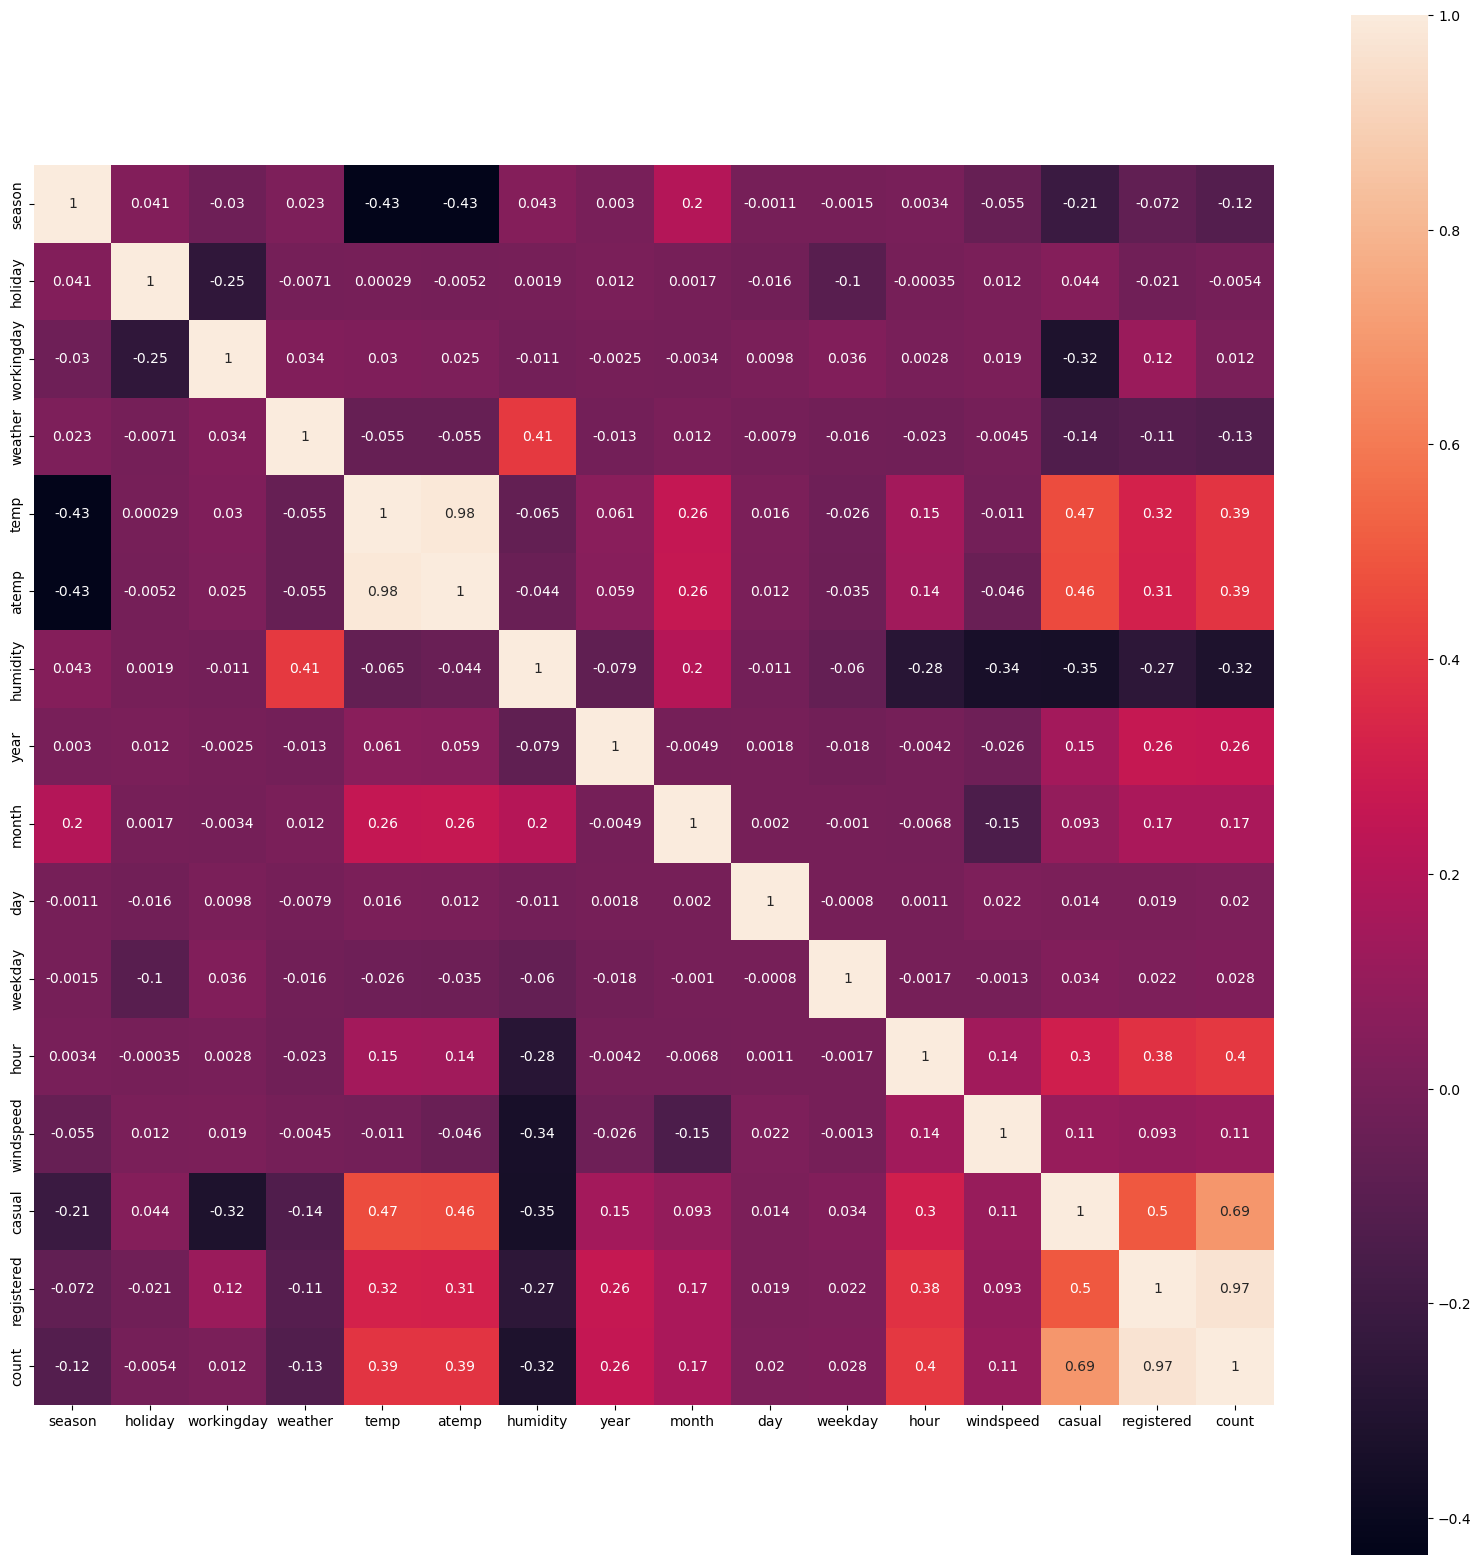

In [46]:
fig = plt.figure(figsize=(20,20))
ax = sns.heatmap(train_.corr(), annot=True, square=True)

Before
count    10886.000000
mean        12.799395
std          8.164537
min          0.000000
25%          7.001500
50%         12.998000
75%         16.997900
max         56.996900
Name: windspeed, dtype: float64

filled by Random Foreset Regressor
count    10886.000000
mean        14.078042
std          6.843724
min          6.003200
25%          8.998100
50%         12.998000
75%         16.997900
max         56.996900
Name: windspeed, dtype: float64


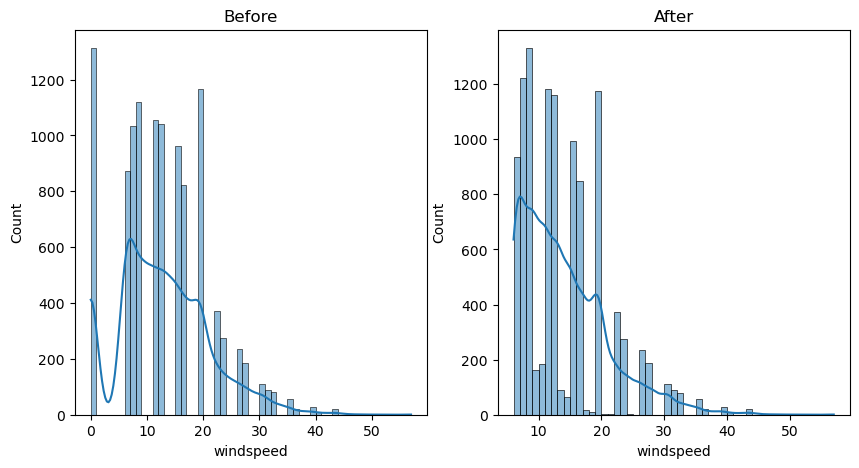

In [47]:
"""
windspeed의 값을 채운 뒤, heatmap으로 변수간 상관관계를 확인
windspeed와 count의 corr은 0.1 -> 0.11로 아주 근소하게 증가
""" 

# 채워진 후의 widnspeed 분포 시각화 비교
fig = plt.figure(figsize=(10,5))

# 채우기 전
ax1 = fig.add_subplot(1,2,1)
ax1 = sns.histplot(train.windspeed, bins=range(int(train.windspeed.min()), int(train.windspeed.max())+1), kde=True)
plt.title('Before')

# 채운 후 
ax2 = fig.add_subplot(1,2,2)
ax2 = sns.histplot(train_.windspeed, bins=range(int(train_.windspeed.min()), int(train.windspeed.max())+1), kde=True)
plt.title('After')

# 정보
print('Before')
print(train.windspeed.describe())
print()

print('filled by Random Foreset Regressor')
print(train_.windspeed.describe())

## test 데이터 전처리 작업

In [48]:
test.head()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed
0,2011-01-20 00:00:00,1,0,1,1,10.66,11.365,56,26.0027
1,2011-01-20 01:00:00,1,0,1,1,10.66,13.635,56,0.0000
2,2011-01-20 02:00:00,1,0,1,1,10.66,13.635,56,0.0000
3,2011-01-20 03:00:00,1,0,1,1,10.66,12.880,56,11.0014
4,2011-01-20 04:00:00,1,0,1,1,10.66,12.880,56,11.0014


In [49]:
# year, month, day, hour 컬럼 추출 
test['year'] = test.datetime.apply(lambda x:x.split('-')[0])
test['month'] = test.datetime.apply(lambda x:x.split('-')[1])
test['day'] = test.datetime.apply(lambda x:x.split('-')[2].split(' ')[0])
test['hour']= test.datetime.apply(lambda x:x.split(' ')[1].split(':')[0])

# weekday 컬럼 추출 
test['weekday'] = test.datetime.apply(lambda x:calendar.day_name[datetime.strptime(x.split(' ')[0], "%Y-%m-%d").weekday()])

# 추출 문자열 숫자 변환 : pandas.to_numeric()
test['year'] = pd.to_numeric(test.year, errors='coerce')
test['month'] = pd.to_numeric(test.month, errors='coerce')
test['day'] = pd.to_numeric(test.day, errors='coerce')
test['hour'] = pd.to_numeric(test.hour, errors='coerce')
test['weekday'] = test.weekday.apply(weekday2int)

In [50]:
# season 컬럼 수정 
test['season'] = test.month.apply(editSeason)

In [51]:
test.head()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,year,month,day,hour,weekday
0,2011-01-20 00:00:00,4,0,1,1,10.66,11.365,56,26.0027,2011,1,20,0,4
1,2011-01-20 01:00:00,4,0,1,1,10.66,13.635,56,0.0000,2011,1,20,1,4
2,2011-01-20 02:00:00,4,0,1,1,10.66,13.635,56,0.0000,2011,1,20,2,4
3,2011-01-20 03:00:00,4,0,1,1,10.66,12.880,56,11.0014,2011,1,20,3,4
4,2011-01-20 04:00:00,4,0,1,1,10.66,12.880,56,11.0014,2011,1,20,4,4


count    6493.000000
mean       12.631157
std         8.250151
min         0.000000
25%         7.001500
50%        11.001400
75%        16.997900
max        55.998600
Name: windspeed, dtype: float64
867


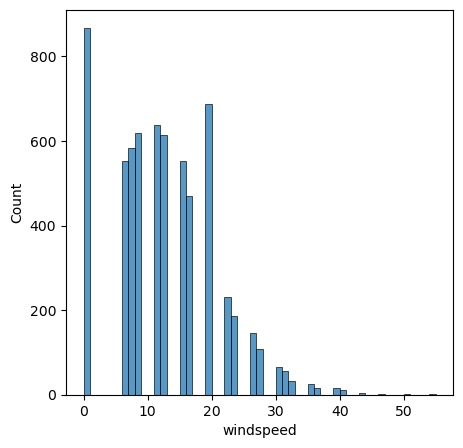

In [52]:
# windspeed 분포 시각화
print(test.windspeed.describe())
print(len(test[test['windspeed']==0]))

fig = plt.figure(figsize=(5,5))
ax = sns.histplot(test.windspeed, bins=range(int(test.windspeed.min()), int(test.windspeed.max())+1))

In [53]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6493 entries, 0 to 6492
Data columns (total 14 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   datetime    6493 non-null   object 
 1   season      6493 non-null   int64  
 2   holiday     6493 non-null   int64  
 3   workingday  6493 non-null   int64  
 4   weather     6493 non-null   int64  
 5   temp        6493 non-null   float64
 6   atemp       6493 non-null   float64
 7   humidity    6493 non-null   int64  
 8   windspeed   6493 non-null   float64
 9   year        6493 non-null   int64  
 10  month       6493 non-null   int64  
 11  day         6493 non-null   int64  
 12  hour        6493 non-null   int64  
 13  weekday     6493 non-null   int64  
dtypes: float64(3), int64(10), object(1)
memory usage: 710.3+ KB


In [54]:
# windspeed 컬럼 값 채우기 with RandomForesetRegressor
test_windspeed_zero = test[test['windspeed'] == 0]
test_windspeed_not_zero = test[test['windspeed']!= 0]

train_X = test_windspeed_not_zero.drop(columns=['datetime', 'windspeed'])
train_y = test_windspeed_not_zero.windspeed

test_X = test_windspeed_zero.drop(columns=['datetime', 'windspeed'])

# model fit
model = RandomForestRegressor()
model.fit(X=train_X, y=train_y)

RandomForestRegressor()

In [55]:
# model predict
predict = model.predict(test_X)

In [56]:
test_windspeed_zero['windspeed'] = predict

In [57]:
# concat dataframe
test_ = pd.concat([test_windspeed_zero, test_windspeed_not_zero], axis=0)
test_.head(20)

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,year,month,day,hour,weekday
1,2011-01-20 01:00:00,4,0,1,1,10.66,13.635,56,10.760133,2011,1,20,1,4
2,2011-01-20 02:00:00,4,0,1,1,10.66,13.635,56,10.700034,2011,1,20,2,4
12,2011-01-20 12:00:00,4,0,1,2,12.30,16.665,42,7.751230,2011,1,20,12,4
60,2011-01-22 13:00:00,4,0,0,1,3.28,8.335,35,10.370193,2011,1,22,13,6
62,2011-01-22 15:00:00,4,0,0,1,4.92,7.575,28,16.299492,2011,1,22,15,6
64,2011-01-22 17:00:00,4,0,0,1,4.92,9.850,28,17.189118,2011,1,22,17,6
69,2011-01-22 22:00:00,4,0,0,1,2.46,7.575,49,10.991484,2011,1,22,22,6
100,2011-01-24 07:00:00,4,0,1,1,0.82,6.060,48,9.010964,2011,1,24,7,1
101,2011-01-24 08:00:00,4,0,1,1,1.64,6.820,49,10.260380,2011,1,24,8,1
102,2011-01-24 09:00:00,4,0,1,1,2.46,7.575,41,12.279090,2011,1,24,9,1


In [58]:
test_ = test_.sort_index()
test_ = test_.drop(columns=['datetime'], axis=1)
test_.head(26)

,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,year,month,day,hour,weekday
0,4,0,1,1,10.66,11.365,56,26.002700,2011,1,20,0,4
1,4,0,1,1,10.66,13.635,56,10.760133,2011,1,20,1,4
2,4,0,1,1,10.66,13.635,56,10.700034,2011,1,20,2,4
3,4,0,1,1,10.66,12.880,56,11.001400,2011,1,20,3,4
4,4,0,1,1,10.66,12.880,56,11.001400,2011,1,20,4,4
5,4,0,1,1,9.84,11.365,60,15.001300,2011,1,20,5,4
6,4,0,1,1,9.02,10.605,60,15.001300,2011,1,20,6,4
7,4,0,1,1,9.02,10.605,55,15.001300,2011,1,20,7,4
8,4,0,1,1,9.02,10.605,55,19.001200,2011,1,20,8,4
9,4,0,1,2,9.84,11.365,52,15.001300,2011,1,20,9,4


In [59]:
test.head(20)

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,year,month,day,hour,weekday
0,2011-01-20 00:00:00,4,0,1,1,10.66,11.365,56,26.0027,2011,1,20,0,4
1,2011-01-20 01:00:00,4,0,1,1,10.66,13.635,56,0.0000,2011,1,20,1,4
2,2011-01-20 02:00:00,4,0,1,1,10.66,13.635,56,0.0000,2011,1,20,2,4
3,2011-01-20 03:00:00,4,0,1,1,10.66,12.880,56,11.0014,2011,1,20,3,4
4,2011-01-20 04:00:00,4,0,1,1,10.66,12.880,56,11.0014,2011,1,20,4,4
5,2011-01-20 05:00:00,4,0,1,1,9.84,11.365,60,15.0013,2011,1,20,5,4
6,2011-01-20 06:00:00,4,0,1,1,9.02,10.605,60,15.0013,2011,1,20,6,4
7,2011-01-20 07:00:00,4,0,1,1,9.02,10.605,55,15.0013,2011,1,20,7,4
8,2011-01-20 08:00:00,4,0,1,1,9.02,10.605,55,19.0012,2011,1,20,8,4
9,2011-01-20 09:00:00,4,0,1,2,9.84,11.365,52,15.0013,2011,1,20,9,4


In [60]:
train_.info()

<class 'pandas.core.frame.DataFrame'>
Index: 10886 entries, 0 to 10885
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   season      10886 non-null  int64  
 1   holiday     10886 non-null  int64  
 2   workingday  10886 non-null  int64  
 3   weather     10886 non-null  int64  
 4   temp        10886 non-null  float64
 5   atemp       10886 non-null  float64
 6   humidity    10886 non-null  int64  
 7   year        10886 non-null  int64  
 8   month       10886 non-null  int64  
 9   day         10886 non-null  int64  
 10  weekday     10886 non-null  int64  
 11  hour        10886 non-null  int64  
 12  windspeed   10886 non-null  float64
 13  casual      10886 non-null  int64  
 14  registered  10886 non-null  int64  
 15  count       10886 non-null  int64  
dtypes: float64(3), int64(13)
memory usage: 1.4 MB


In [61]:
test_.info()

<class 'pandas.core.frame.DataFrame'>
Index: 6493 entries, 0 to 6492
Data columns (total 13 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   season      6493 non-null   int64  
 1   holiday     6493 non-null   int64  
 2   workingday  6493 non-null   int64  
 3   weather     6493 non-null   int64  
 4   temp        6493 non-null   float64
 5   atemp       6493 non-null   float64
 6   humidity    6493 non-null   int64  
 7   windspeed   6493 non-null   float64
 8   year        6493 non-null   int64  
 9   month       6493 non-null   int64  
 10  day         6493 non-null   int64  
 11  hour        6493 non-null   int64  
 12  weekday     6493 non-null   int64  
dtypes: float64(3), int64(10)
memory usage: 710.2 KB


## test 데이터 예측 

In [62]:
train_.head()

,season,holiday,workingday,weather,temp,atemp,humidity,year,month,day,weekday,hour,windspeed,casual,registered,count
0,4,0,0,1,9.84,14.395,81,2011,1,1,6,0,8.111824,3,13,16
1,4,0,0,1,9.02,13.635,80,2011,1,1,6,1,7.992095,8,32,40
2,4,0,0,1,9.02,13.635,80,2011,1,1,6,2,7.842216,5,27,32
3,4,0,0,1,9.84,14.395,75,2011,1,1,6,3,7.052487,3,10,13
4,4,0,0,1,9.84,14.395,75,2011,1,1,6,4,7.002572,0,1,1


In [63]:
test_.head()

,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,year,month,day,hour,weekday
0,4,0,1,1,10.66,11.365,56,26.002700,2011,1,20,0,4
1,4,0,1,1,10.66,13.635,56,10.760133,2011,1,20,1,4
2,4,0,1,1,10.66,13.635,56,10.700034,2011,1,20,2,4
3,4,0,1,1,10.66,12.880,56,11.001400,2011,1,20,3,4
4,4,0,1,1,10.66,12.880,56,11.001400,2011,1,20,4,4


In [64]:
drop_columns = ['casual', 'registered', 'count']

train_X = train_.drop(columns=drop_columns, axis=1)
train_y_casual = train_['casual']
train_y_registered = train_['registered']
train_y_count = train_['count']


In [65]:
# 선형 회귀 모델 
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_log_error

model = LinearRegression()

# target 값 log 취해 줌 
train_y_count_log = np.log1p(train_y_count)

# model.fit() # 학습 
model.fit(train_X, train_y_count_log)

# model.predict() # 예측
preds = model.predict(train_X)

# 예측 값과 실제 값 
print(f"Linear Regression RMSLE : {np.sqrt(mean_squared_log_error(np.exp(train_y_count_log), np.exp(preds)))}")


Linear Regression RMSLE : 0.9773513627944663


In [66]:
"""
RMSLE 값이 너무 높게 나왔다.. 
"""

'\nRMSLE 값이 너무 높게 나왔다.. \n'

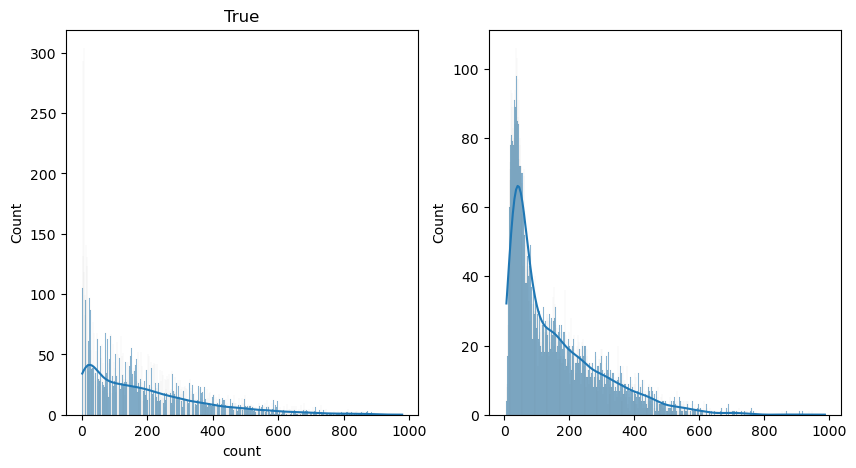

In [67]:
# train_y_count 분포 
fig = plt.figure(figsize=(10,5))
ax1 = fig.add_subplot(1,2,1)
ax1 = sns.histplot(np.exp(train_y_count_log), bins=range(int(train_y_count.min()), int(train_y_count.max())+1), kde=True)
plt.title('True')

ax2 = fig.add_subplot(1,2,2)
ax2 = sns.histplot(np.exp(preds), bins=range(int(train_y_count.min()), int(train_y_count.max())+1), kde=True)

In [73]:
"""
GridSearchCV를 화룡하면 우리가 이용하게 될 각각의 모델마다 미세 조정할 파라미터의 최적의 값을 알 수 있다.
"""
from sklearn.linear_model import Ridge, Lasso
from sklearn.model_selection import GridSearchCV
from sklearn import metrics

# Ridge 모델은 L2제약을 가지는 선형회귀모델에서 개선된 모델이며, 해당 모델에서 중요한 파라미터는 alpha값이다.
ridge = Ridge()

# 튜닝하고자 하는 ridge의 파라미터 중 특정 파라미터에 배열 값으로 넘겨주면 테스트 후 어떤 파라미터가 최적의 값인지 계산해줌
ridge_params = {
    'max_iter' : [3000],
    'alpha' : [0.001, 0.01, 0.1, 1.0, 10.0, 100.0, 1000.0]
}

# rmsle 정의
def rmsle(y, y_hat):
    import numpy as np
    from sklearn.metrics import mean_squared_log_error
    return np.sqrt(mean_squared_log_error(y, y_hat))

rmsle_scorer = metrics.make_scorer(rmsle, greater_is_better=False)
grid_ridge = GridSearchCV(ridge, ridge_params, scoring=rmsle_scorer, cv=5)

grid_ridge.fit(train_X, train_y_count_log)
preds = grid_ridge.predict(train_X)
print(grid_ridge.best_params_)
print(f"Ridge Regression RMSLE : {np.sqrt(mean_squared_log_error(np.exp(train_y_count_log), np.exp(preds)))}")

{'alpha': 0.001, 'max_iter': 3000}
Ridge Regression RMSLE : 0.9773513625482871


In [72]:
# grid_ridge의 cv_result_를 통해 alpha값의 변화에 따른 평균 값의 변화를 파악 가능
grid_ridge_cv_result = pd.DataFrame(grid_ridge.cv_results_)
grid_ridge_cv_result.head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_alpha,param_max_iter,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
0,0.002144,0.000227,0.000965,0.000112,0.001,3000,"{'alpha': 0.001, 'max_iter': 3000}",-0.267480,-0.207423,-0.254369,-0.221208,-0.208250,-0.231746,0.024671,1
1,0.001778,0.000182,0.000876,0.000131,0.01,3000,"{'alpha': 0.01, 'max_iter': 3000}",-0.267480,-0.207423,-0.254369,-0.221208,-0.208250,-0.231746,0.024671,2
2,0.001785,0.000079,0.000873,0.000090,0.1,3000,"{'alpha': 0.1, 'max_iter': 3000}",-0.267481,-0.207424,-0.254369,-0.221208,-0.208250,-0.231746,0.024672,3
3,0.001573,0.000154,0.000745,0.000096,1.0,3000,"{'alpha': 1.0, 'max_iter': 3000}",-0.267490,-0.207429,-0.254371,-0.221203,-0.208245,-0.231748,0.024675,4
4,0.001681,0.000079,0.000752,0.000043,10.0,3000,"{'alpha': 10.0, 'max_iter': 3000}",-0.267584,-0.207481,-0.254396,-0.221157,-0.208197,-0.231763,0.024710,5


In [74]:
# lasso 모델은 L1 regularization을 가지며, alpha값의 조정을 통해 모델을 최적화 해야한다.
lasso = Lasso()

lasso_params = {
    'max_iter' : [3000],
    'alpha' : [0.001, 0.01, 0.1, 1.0, 10.0, 100.0, 1000.0]
}
rmsle_scorer = metrics.make_scorer(rmsle, greater_is_better=False)
grid_lasso = GridSearchCV(lasso, lasso_params, scoring=rmsle_scorer, cv=5)

grid_lasso.fit(train_X, train_y_count_log)
preds = grid_lasso.predict(train_X)
print(grid_lasso.best_params_)
print(f"Lasso Regression RMSLE : {np.sqrt(mean_squared_log_error(np.exp(train_y_count_log), np.exp(preds)))}")


{'alpha': 0.001, 'max_iter': 3000}
Lasso Regression RMSLE : 0.9773609501552526


In [76]:
rf = RandomForestRegressor()

rf_params = {
    'n_estimators' : [1,10,100]
}

grid_rf = GridSearchCV(rf, rf_params, scoring=rmsle_scorer, cv = 5)
grid_rf.fit(train_X, train_y_count_log)
preds = grid_rf.predict(train_X)
print(grid_rf.best_params_)
print(f'Random Forest Regression RMSLE : {rmsle(np.exp(train_y_count_log), np.exp(preds))}')

{'n_estimators': 100}
Random Forest Regression RMSLE : 0.10287241874472436


In [77]:
from sklearn.ensemble import GradientBoostingRegressor

gbr = GradientBoostingRegressor()

gbr_params = {
    'max_depth' : range(1,11,1),
    'n_estimators' : [1,10,100]
}

grid_gbr = GridSearchCV(gbr, gbr_params, scoring=rmsle_scorer, cv=5)
grid_gbr.fit(train_X, train_y_count_log)
preds = grid_gbr.predict(train_X)
print(grid_gbr.best_params_)
print(f'Gradient Boosting RMSLE : {rmsle(np.exp(train_y_count_log), np.exp(preds))}')

{'max_depth': 6, 'n_estimators': 100}
Gradient Boosting RMSLE : 0.20532390979860038


In [78]:
train_y_count_log

0        2.833213
1        3.713572
2        3.496508
3        2.639057
4        0.693147
           ...   
10881    5.820083
10882    5.488938
10883    5.129899
10884    4.867534
10885    4.488636
Name: count, Length: 10886, dtype: float64

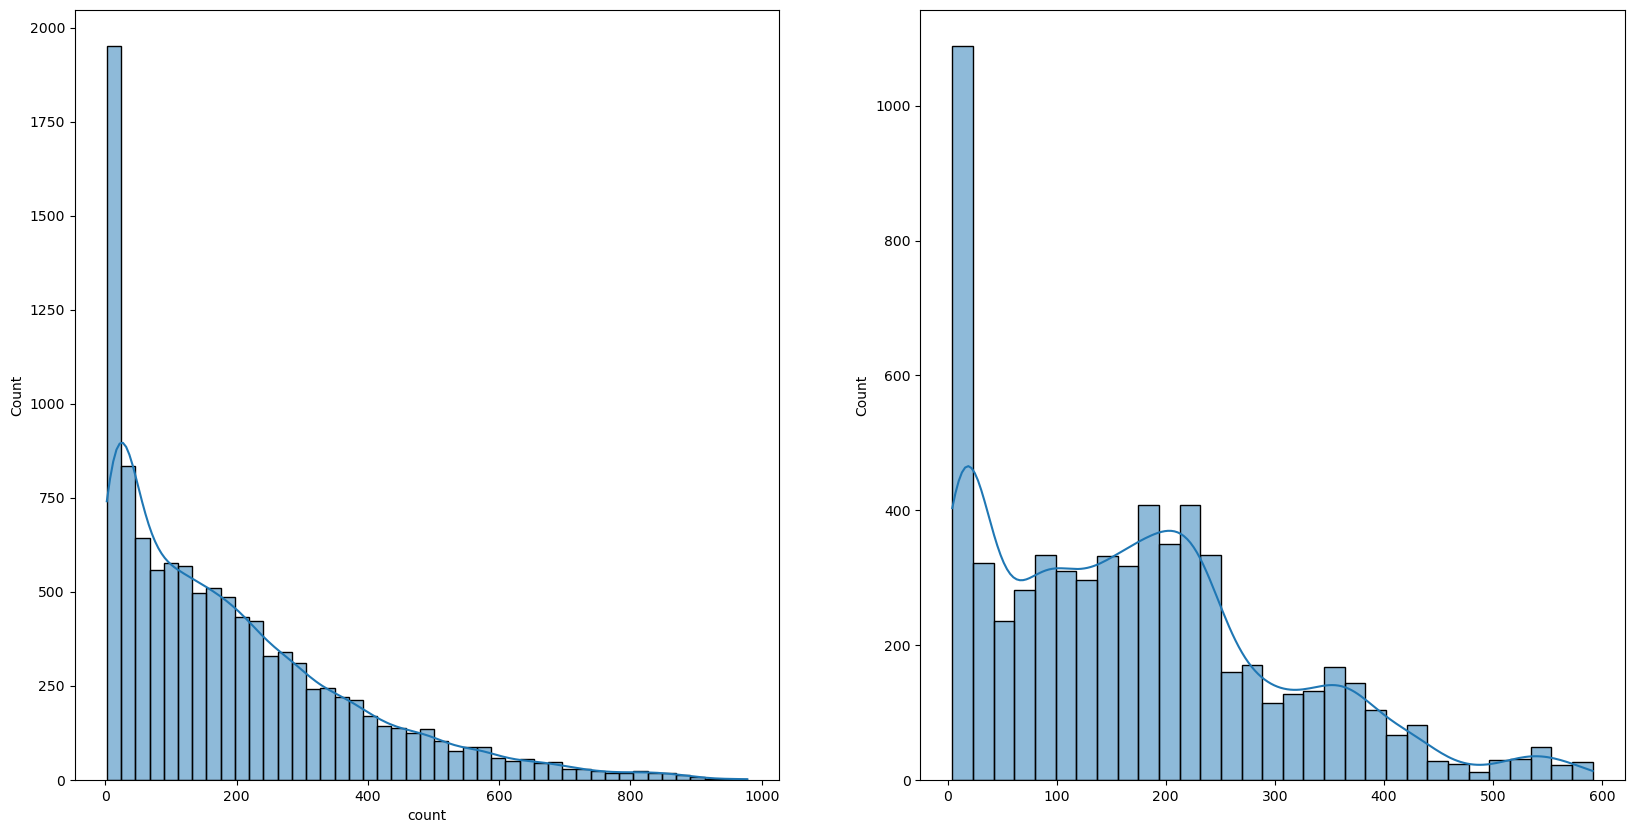

In [86]:
test_.columns = train_X.columns

predsTest = grid_gbr.predict(test_)

fig = plt.figure(figsize=(20,10))

ax1 = fig.add_subplot(1,2,1)
ax1 = sns.histplot(np.exp(train_y_count_log), kde=True)

ax2 = fig.add_subplot(1,2,2)
ax2 = sns.histplot(np.exp(predsTest), kde=True)


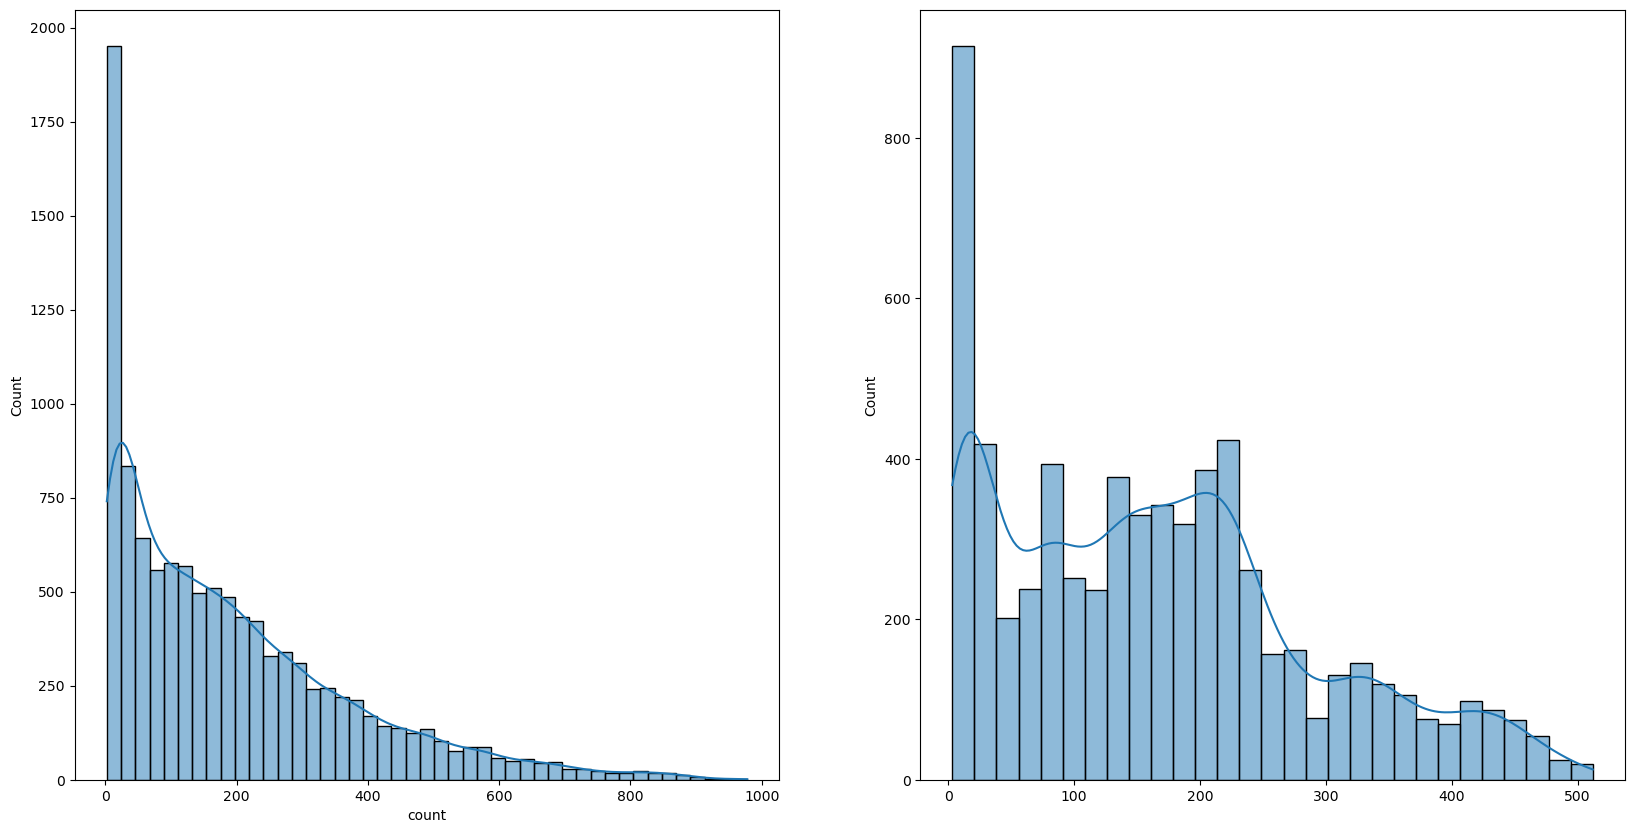

In [87]:
test_.columns = train_X.columns

predsTest = grid_rf.predict(test_)

fig = plt.figure(figsize=(20,10))

ax1 = fig.add_subplot(1,2,1)
ax1 = sns.histplot(np.exp(train_y_count_log), kde=True)

ax2 = fig.add_subplot(1,2,2)
ax2 = sns.histplot(np.exp(predsTest), kde=True)

In [94]:
predsTest_df = pd.DataFrame({
    countpredsTest)

,0
0,3.535458
1,2.785633
2,2.484696
3,1.379073
4,1.447789
...,...
6488,5.288933
6489,5.052848
6490,4.825161
6491,4.561447


In [91]:
submission = pd.read_csv('./data/bike-sharing-demand/sampleSubmission.csv')

In [95]:
submission['count'] = np.exp(predsTest)

In [96]:
submission

,datetime,count
0,2011-01-20 00:00:00,34.310714
1,2011-01-20 01:00:00,16.210084
2,2011-01-20 02:00:00,11.997470
3,2011-01-20 03:00:00,3.971218
4,2011-01-20 04:00:00,4.253699
...,...,...
6488,2012-12-31 19:00:00,198.131858
6489,2012-12-31 20:00:00,156.467428
6490,2012-12-31 21:00:00,124.606509
6491,2012-12-31 22:00:00,95.721884


In [97]:
submission.to_csv('./data/bike-sharing-demand/submission.csv')
